![forest](https://i.imgur.com/3tGpAwL.jpg)
<h1 align="center">Exploring Roosevelt Natl. Forest Cover Types</h1><br>
Here's my exploration of this dataset for predicting leaf cover varieties in the Colorado mountains. It's a bit exhaustive as a way of gathering all the information in one place and attempting to consolidate it in a more human-readable fashion. Much of this first section is most likely a reversal of changes previously made to the data set, such as returning dummies to categorical types.
<h2>Project setup</h2>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_columns', 100)

In [3]:
# Set up labels 
cover_types = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"}
wild_areas = {
    1: "Rawah Wilderness Area",
    2: "Neota Wilderness Area",
    3: "Comanche Peak Wilderness Area",
    4: "Cache la Poudre Wilderness Area"}

<h2>Read input data files into Pandas dataframes</h2>

In [4]:
train_raw = pd.read_csv("../input/train.csv")
test_raw = pd.read_csv("../input/test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [5]:
train_raw.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


<h2>Relabel data for interpretation</h2><br>
Since the raw dataframe is a little extensive, I'll clean it up for plotting and readability.

In [6]:
train = train_raw.copy()
test = test_raw.copy()

<h3>Relabel cover types with descriptive values</h3>

In [7]:
train['Cover_Type'] = train['Cover_Type'].apply(lambda x: cover_types[x])

<h3>Relabel wilderness areas with true names</h3>

In [8]:
df = train[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]]
df = df.idxmax(axis=1)
train["Wilderness_Area1"] = df.apply(lambda x: wild_areas[int(x.split("Wilderness_Area")[1])])
train = train.rename(columns = {"Wilderness_Area1": "Wilderness_Area"})
train.drop(["Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"], axis=1, inplace=True)

<h3>Restructure soil types as categorical column</h3>

In [9]:
train['Soil_Type1'] = train[train.columns[12:52]].idxmax(axis=1)
train = train.rename(columns = {"Soil_Type1": "Soil_Type"})
train.drop(train.columns[13:52], inplace=True, axis=1)

In [10]:
train.columns = train.columns.str.replace("_", " ")
train.drop("Id", inplace=True, axis=1)

<h2>Inspect newly labeled and organized data</h2>

In [11]:
train.head()

,Elevation,Aspect,Slope,Horizontal Distance To Hydrology,Vertical Distance To Hydrology,Horizontal Distance To Roadways,Hillshade 9am,Hillshade Noon,Hillshade 3pm,Horizontal Distance To Fire Points,Wilderness Area,Soil Type,Cover Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah Wilderness Area,Soil_Type29,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah Wilderness Area,Soil_Type29,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah Wilderness Area,Soil_Type12,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah Wilderness Area,Soil_Type30,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah Wilderness Area,Soil_Type29,Aspen


In [12]:
train.describe()

,Elevation,Aspect,Slope,Horizontal Distance To Hydrology,Vertical Distance To Hydrology,Horizontal Distance To Roadways,Hillshade 9am,Hillshade Noon,Hillshade 3pm,Horizontal Distance To Fire Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


<h2>Relabel Test Data</h2> <br>
Here's all the same (relavant) relabeling done to the test dataframe for later comparison purposes.

In [13]:
# Relabel wilderness areas with true names
df = test[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]]
df = df.idxmax(axis=1)
test["Wilderness_Area1"] = df.apply(lambda x: wild_areas[int(x.split("Wilderness_Area")[1])])
test = test.rename(columns = {"Wilderness_Area1": "Wilderness_Area"})
test.drop(["Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"], axis=1, inplace=True)
# Restructure soil types as categorical column
test['Soil_Type1'] = test[test.columns[12:52]].idxmax(axis=1)
test = test.rename(columns = {"Soil_Type1": "Soil_Type"})
test.drop(test.columns[13:52], inplace=True, axis=1)
test.columns = test.columns.str.replace("_", " ")

<h2>Data Visualisation</h2>
<br>
Let's look at some plots of the dataset. For some of these we'll have to actually go back to the raw data in order to get the columns in a form that can be graphed properly. 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

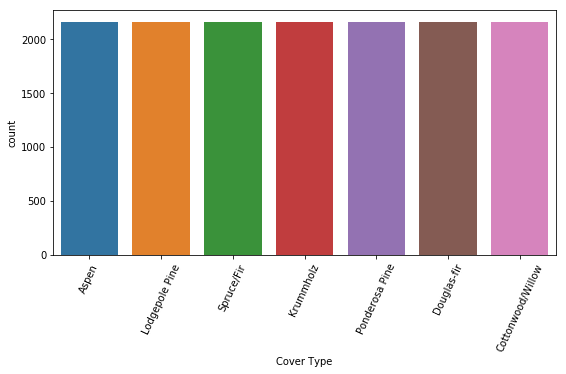

In [16]:
plt.figure(figsize=(9,4.5))
sns.countplot(x="Cover Type", data=train)
plt.xticks(rotation=65)

We can see that each cover type is equally represented in the set. Let's look at how they're distributed relative to some of the other variables.

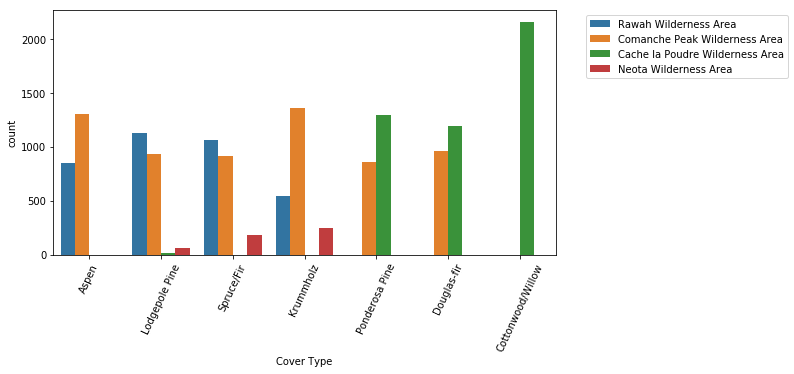

In [17]:
plt.figure(figsize=(9,4.5))
sns.countplot(x='Cover Type', hue='Wilderness Area', data=train)
plt.xticks(rotation=65)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

This plot shows us that there seems to be significant correlation between cover type and wilderness area, and that the Neota Area has a much smaller representation than the others. Let's do one more visualization using the soil types.

In [18]:
df = pd.DataFrame(train['Soil Type'].value_counts())   
df.reset_index(inplace=True)
df.columns = ['Soil Type', 'Soil Count']

Text(0.5,1,'Train Soil Types')

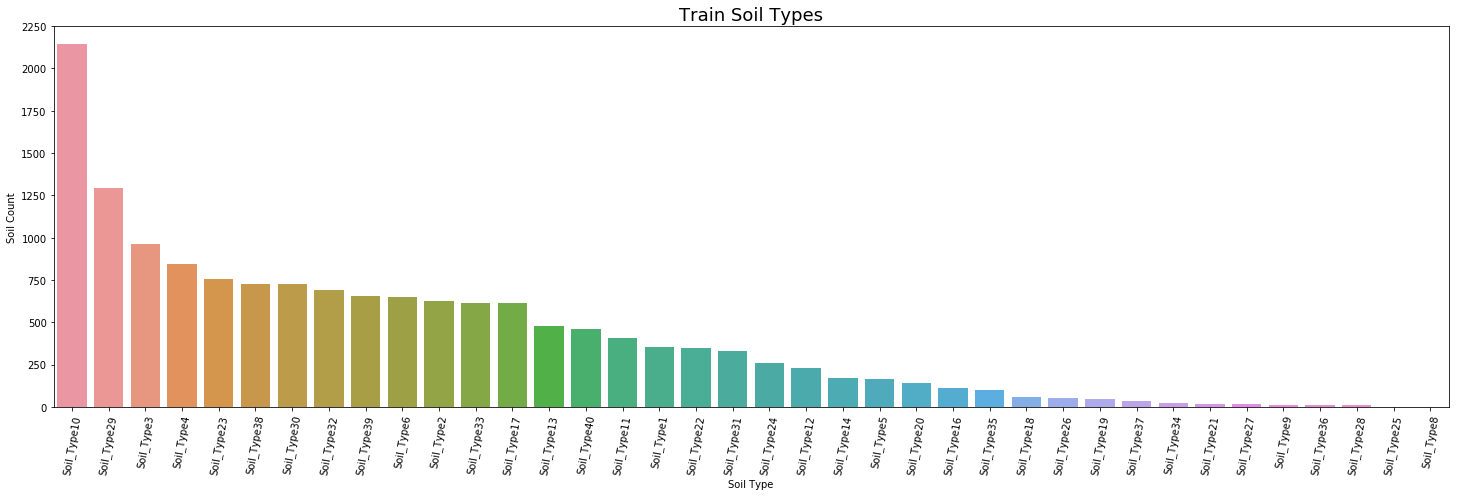

In [19]:
plt.figure(figsize=(25, 7))
sns.barplot(x='Soil Type', y='Soil Count', data=df)
plt.xticks(rotation=80)
sns.set_context("notebook", font_scale=1.5)
plt.title('Train Soil Types')

Now we can see that the most common soil type by far is Soil_Type10, and the least common types are barely represented, if at all. Let's check on those rarer types to see if they have any entries at all.

In [20]:
df.tail()

,Soil Type,Soil Count
33,Soil_Type9,10
34,Soil_Type36,10
35,Soil_Type28,9
36,Soil_Type25,1
37,Soil_Type8,1


Ok, there's at least one entry for all soil types, but we should be aware that some of them have very low representation. In order to have good predictions, we'd hope our test data to have similar trends to our training set, so let's take a look at the test set to see the distibution. 

In [21]:
df = pd.DataFrame(test['Soil Type'].value_counts())   
df.reset_index(inplace=True)
df.columns = ['Soil Type', 'Soil Count']

Text(0.5,1,'Test Soil Types')

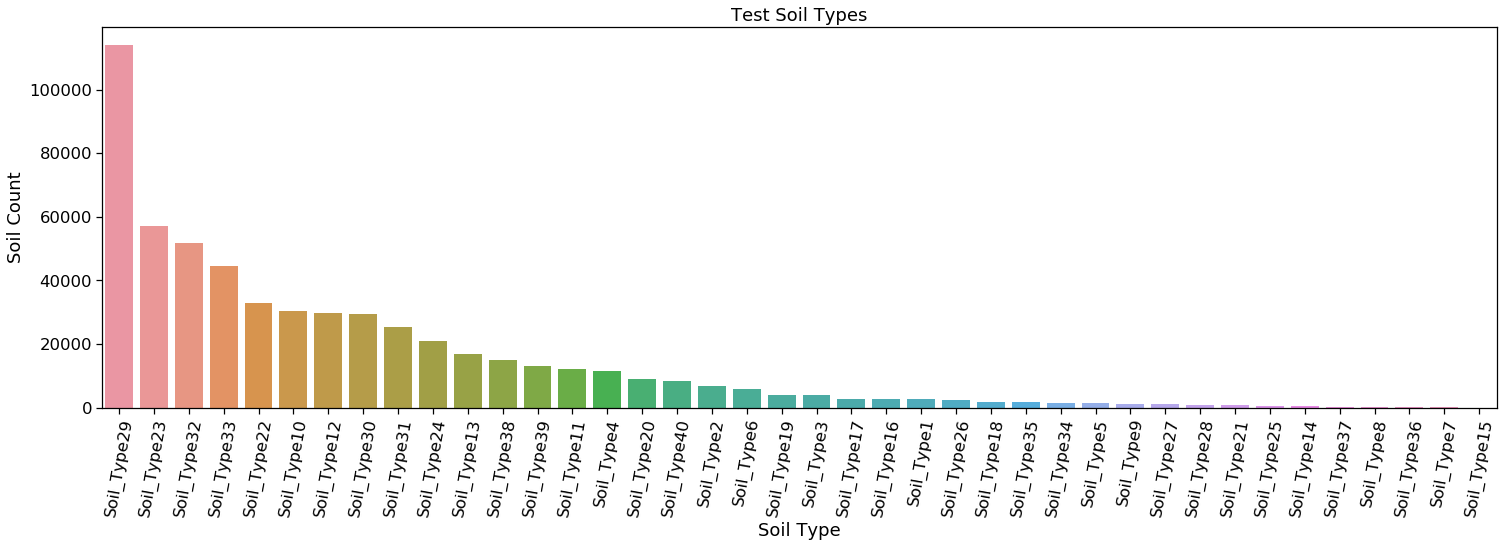

In [22]:
plt.figure(figsize=(25, 7))
sns.barplot(x='Soil Type', y='Soil Count', data=df)
plt.xticks(rotation=80)
sns.set_context("notebook", font_scale=1.5)
plt.title('Test Soil Types')

In [23]:
df.tail()

,Soil Type,Soil Count
35,Soil_Type37,264
36,Soil_Type8,178
37,Soil_Type36,109
38,Soil_Type7,105
39,Soil_Type15,3


The test data has a very similar distibution of soil types to training. Although the ranking differs for individual types, the similarity seems enough for meaninful usage. In combination with the other features, we'll see how the model overcomes these descrepancies.
<br>

In [24]:
# Save altered data
train1 = train
test1 = test

# Reset train and test sets to original states
train = train_raw.copy()
test = test_raw.copy()

## Feature Building

The data set shows multiple columns of location in relation to certain geographical amenities. By combining these variables we can create new features as a function of distance from these amenities. These new features are likely to have higher importance in our prediction model because they are more specific descriptions than the isolated indicators of location. [Lathwal](https://www.kaggle.com/codename007) has already done this engineering well in [his notebook](https://www.kaggle.com/codename007/forest-cover-type-eda-baseline-model), so I will borrow his new features for use in this model. The next cell is his code.

In [25]:
####################### Train data #############################################
train['HF1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
train['HF2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HR1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['HR2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['FR1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['FR2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
train['ele_vert'] = train.Elevation-train.Vertical_Distance_To_Hydrology

train['slope_hyd'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
train.slope_hyd=train.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
train['Mean_Amenities']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
train['Mean_Fire_Hyd']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology) / 2 

####################### Test data #############################################
test['HF1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']
test['HF2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HR1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['HR2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['FR1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['FR2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])
test['ele_vert'] = test.Elevation-test.Vertical_Distance_To_Hydrology

test['slope_hyd'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5
test.slope_hyd=test.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
test['Mean_Amenities']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
test['Mean_Fire_Hyd']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology) / 2

In [26]:
features = [col for col in train.columns if col not in ['Cover_Type','Id']]

## Run Classifier Models

In [27]:
# Set up test values from the already classified data so that I can test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Cover_Type'], test_size=0.3)

In [29]:
predictions = pd.DataFrame()

### Random Forests

Considering the source data, Random Forests of decision trees seems like a poetically appropriate model to apply, although it may not be the most functional. Let's see how well it predicts.

In [30]:
# Benefit from n_estimators seems to level out around 1000
# with n_estimators=500, accuracy=0.78643 (119th place)
# with n_estimators=750, accuracy=0.78699 (114th place)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=750)

In [31]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 47.1 s, sys: 594 ms, total: 47.6 s
Wall time: 48 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
%%time
predictions['Random Forest'] = rfc.predict(X_test)

CPU times: user 2.01 s, sys: 25.2 ms, total: 2.03 s
Wall time: 2.08 s


In [33]:
print(classification_report(y_test, predictions['Random Forest']))
print(confusion_matrix(y_test, predictions['Random Forest']))

             precision    recall  f1-score   support

          1       0.82      0.81      0.82       655
          2       0.84      0.73      0.78       653
          3       0.86      0.87      0.87       615
          4       0.95      0.98      0.96       626
          5       0.92      0.95      0.93       667
          6       0.88      0.90      0.89       689
          7       0.95      0.98      0.96       631

avg / total       0.89      0.89      0.89      4536

[[532  78   0   0  12   2  31]
 [105 477  13   0  39  17   2]
 [  0   5 537  20   3  50   0]
 [  0   0   5 614   0   7   0]
 [  2   5  21   0 632   7   0]
 [  0   4  47  15   2 621   0]
 [ 11   1   0   0   0   0 619]]


### Extra Trees

Adding in the extra trees classifier will give another model to check against. 

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
etc = RandomForestClassifier(n_estimators=750)

In [35]:
%%time
etc.fit(X_train, y_train)

CPU times: user 19.5 s, sys: 222 ms, total: 19.7 s
Wall time: 19.7 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
%%time
predictions['Extra Trees'] = etc.predict(X_test)

CPU times: user 878 ms, sys: 8.29 ms, total: 887 ms
Wall time: 886 ms


In [37]:
print(classification_report(y_test, predictions['Extra Trees']))
print(confusion_matrix(y_test, predictions['Extra Trees']))

             precision    recall  f1-score   support

          1       0.82      0.80      0.81       655
          2       0.83      0.74      0.78       653
          3       0.86      0.87      0.87       615
          4       0.95      0.98      0.96       626
          5       0.92      0.95      0.93       667
          6       0.88      0.90      0.89       689
          7       0.95      0.98      0.97       631

avg / total       0.89      0.89      0.89      4536

[[526  85   0   0  12   2  30]
 [102 481  13   0  39  17   1]
 [  0   5 535  18   3  54   0]
 [  0   0   5 613   0   8   0]
 [  1   5  19   0 635   7   0]
 [  0   4  47  15   3 620   0]
 [ 11   1   0   0   0   0 619]]


### Gradient Boosting 

Gradient boosting classifier will give me another model for a vote consensus. 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
#gbc = AdaBoostClassifier(GradientBoostingClassifier(n_estimators=100), n_estimators=10, learning_rate=.1, algorithm='SAMME')
gbc = AdaBoostClassifier(GradientBoostingClassifier(n_estimators=1000, max_depth=10), n_estimators=1000, learning_rate=0.01, algorithm="SAMME")


In [48]:
%%time
gbc.fit(X_train, y_train)

CPU times: user 3min 15s, sys: 1.7 s, total: 3min 17s
Wall time: 3min 20s


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          learning_rate=0.1, n_estimators=10, random_state=None)

In [49]:
%%time
predictions['Gradient Boosting'] = gbc.predict(X_test)

CPU times: user 659 ms, sys: 14.1 ms, total: 673 ms
Wall time: 689 ms


In [50]:
print(classification_report(y_test, predictions['Gradient Boosting']))
print(confusion_matrix(y_test, predictions['Gradient Boosting']))

             precision    recall  f1-score   support

          1       0.77      0.76      0.76       655
          2       0.73      0.68      0.71       653
          3       0.78      0.81      0.80       615
          4       0.94      0.97      0.95       626
          5       0.88      0.90      0.89       667
          6       0.84      0.82      0.83       689
          7       0.93      0.95      0.94       631

avg / total       0.84      0.84      0.84      4536

[[497 108   0   0   9   1  40]
 [121 444  12   0  58  16   2]
 [  0   3 499  27  10  76   0]
 [  0   0  10 608   0   8   0]
 [  4  37  20   0 600   6   0]
 [  0  12  96  14   4 563   0]
 [ 27   2   0   0   1   0 601]]


### Ada Boost

I'll also do an Ada boosting classifier on the Extra Trees model, and play with the parameters to squeeze better accuracy out of it.

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=500), n_estimators=500, learning_rate=.1, algorithm='SAMME')

In [52]:
%%time
abc.fit(X_train, y_train)

CPU times: user 10.4 s, sys: 1.07 s, total: 11.5 s
Wall time: 11.8 s


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          learning_rate=0.1, n_estimators=500, random_state=None)

In [53]:
%%time
predictions['Ada Boost'] = abc.predict(X_test)

CPU times: user 825 ms, sys: 18.4 ms, total: 844 ms
Wall time: 896 ms


In [54]:
print(classification_report(y_test, predictions['Ada Boost']))
print(confusion_matrix(y_test, predictions['Ada Boost']))

             precision    recall  f1-score   support

          1       0.85      0.81      0.83       655
          2       0.83      0.78      0.80       653
          3       0.89      0.89      0.89       615
          4       0.95      0.98      0.97       626
          5       0.93      0.96      0.94       667
          6       0.90      0.92      0.91       689
          7       0.96      0.98      0.97       631

avg / total       0.90      0.90      0.90      4536

[[532  89   0   0   8   1  25]
 [ 81 511  13   0  34  13   1]
 [  0   4 546  16   3  46   0]
 [  0   0   5 615   0   6   0]
 [  1   8  14   0 638   6   0]
 [  0   2  34  14   2 637   0]
 [  9   3   0   0   0   0 619]]


## Tally up Votes


In [55]:
predictions.describe()

,Random Forest,Extra Trees,Gradient Boosting,Ada Boost
count,4536.000000,4536.000000,4536.000000,4536.000000
mean,4.074735,4.078704,4.034171,4.071208
std,1.997775,1.994972,1.994795,1.991714
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000


In [56]:
%%time
# This takes an unreasonably long time to execute. Maybe consider using VotingClassifier from sklearn.ensemble in
# the future.
pred = predictions.mode(axis=1)

CPU times: user 2.59 s, sys: 200 ms, total: 2.79 s
Wall time: 2.98 s


In [57]:
print(classification_report(y_test, pred[0]))
print(confusion_matrix(y_test, pred[0]))

             precision    recall  f1-score   support

          1       0.82      0.82      0.82       655
          2       0.84      0.73      0.78       653
          3       0.86      0.87      0.87       615
          4       0.95      0.98      0.96       626
          5       0.92      0.95      0.94       667
          6       0.89      0.90      0.89       689
          7       0.96      0.98      0.97       631

avg / total       0.89      0.89      0.89      4536

[[540  78   0   0  11   1  25]
 [110 477  12   0  38  15   1]
 [  0   5 538  18   3  51   0]
 [  0   0   6 614   0   6   0]
 [  1   6  20   0 633   7   0]
 [  0   4  50  15   2 618   0]
 [ 11   1   0   0   0   0 619]]


## Get Predictions from Best Model

While Random Forests and Extra Trees did pretty well at 89% accuracy, using AdaBoost with Extra Trees was the highest at 90%. Since the voting mechanism detracts from this accuracy, I'll submit my predictions from just the AdaBoost with Extra Trees model. The cells below run the model on the real test data.

In [64]:
X_train = train[features]
y_train = train['Cover_Type']
X_test = test[features]

In [65]:
abc2 = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=500), n_estimators=500, learning_rate=.1, algorithm='SAMME')

In [66]:
%%time
abc2.fit(X_train, y_train)

CPU times: user 13.4 s, sys: 1.42 s, total: 14.8 s
Wall time: 15.2 s


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          learning_rate=0.1, n_estimators=500, random_state=None)

In [68]:
%%time
pred = abc2.predict(X_test)

CPU times: user 56.5 s, sys: 6.44 s, total: 1min 2s
Wall time: 1min 4s


<h1>Print submission file</h1>

In [69]:
sub = pd.DataFrame({"Id": test["Id"], "Cover_Type": predictions['Ada Boost'].astype('int')})
sub.reindex().head()

,Id,Cover_Type
0,15121,7.0
1,15122,1.0
2,15123,6.0
3,15124,4.0
4,15125,5.0


In [70]:
sub.to_csv("submission.csv", index=False)

This notebook is an example of what is possible with a simple analysis + prediction, without going much into tweaking parameters of the models. If you'd like to leave a commment, please do. I welcome any feedback to further my own learning process. 